# Pendahuluan

## InaCAWO

<p style="text-indent: 30px;">
Indonesian Coupled Atmosphere-Wave-Ocean (InaCAWO) merupakan model terpadu (<i>coupled</i>) beresolusi tinggi yang menyediakan prakiraan metorologi-oseanografi yang disesuaikan untuk wilayah "Benua Maritim". Seperti namanya, model terpadu ini menggunakan dari tiga (3) model utama yaitu: model atmosfer, model gelombang laut, dan model oseanografi, yang didesain untuk saling "berkomunikasi" satu dengan yang lain. 
</p>

<!-- ![Bathymetrie Model](imgs/02_bathy_.png) -->
<p style="text-align: center;">
  <img src="imgs/02_bathy_.png" width="800">
</p>

<p style="text-indent: 30px;">
    Model-model seperti <i>Weather Research Forecasting</i> (WRF), <i>Regional Ocean Modelling System</i> (ROMS), dan <i>Simulating Waves Nearshore</i> (SWAN) digunakan bersama-sama dengan <i>Model Coupling Toolkit</i> (MCT) untuk menghasilkan prediksi kondisi cuaca, laut, dan gelombang secara serentak.
</p>

Berikut merupakan tabel deskripsi umum dan singkat mengenai InaCAWO:

| No | Parameter                      | Deskripsi                                      |
|----|----------------------------------|-------------------------------------------------------|
| 1  | Cycle | 4 cycles per day [00Z, 06Z, 12Z, 18Z] |
| 2  | Resolution - Temporal | 1hr   |
| 3  | Resolution - Spatial | ~3km   |
| 4  | Domain extent        | [90&deg;E - 145&deg;E; 15&deg;S - 15&deg;N] |

---

## Data NetCDF

<p style="text-indent: 30px;">
  <i>Network Common Data Form (NetCDF)</i> merupakan format data hierarkis, dalam hal ini berarti bahwa data disusun bertingkat. Format data ini banyak digunakan pada penyimpanan data geospasial (dalam hal ini data atmosfer dan oseanografi) karena beberapa alasan, yaitu:
</p>
<ol style="margin-left: 60px;">
  <li>Mudah dibaca oleh mesin dan banyak didukung oleh pustaka pemrograman</li>
  <li>Dapat menyimpan metadata bersama data utama</li>
  <li>Mendukung dimensi waktu dan ruang, cocok untuk data atmosfer & laut</li>
</ol>


Berikut merupakan contoh struktur pada data NetCDF:

```python
/ (root)
├── dimensions
│   ├── time = 365
│   ├── depth = 50
│   ├── lat = 200
│   └── lon = 300
│
├── variables
│   ├── time(time)
│   ├── depth(depth)
│   ├── lat(lat)
│   ├── lon(lon)
│   ├── temperature(time, depth, lat, lon)
│   ├── salinity(time, depth, lat, lon)
│   ├── u_velocity(time, depth, lat, lon)
│   └── v_velocity(time, depth, lat, lon)
│
├── attributes (metadata)
│   ├── title = "Model Output: Ocean Circulation"
│   ├── institution = "Pusat Oseanografi Fisis"
│   ├── model = "ROMS"
│   ├── references = "doi:10.xxxx/roms_output"
│   └── history = "Created on 2025-04-01"
```
---

# Akses Data
## Keluaran Model
### Umum


<p style="text-indent: 30px;">
  Bahasa pemrograman Python memungkinkan kita untuk melakukan pengolahan data yang disimpan dalam format NetCDF. Tentu saja untuk melakukan pengolahan data, terlebih dahulu kita harus memuat atau membuka file terlebih dahulu. Terdapat beberapa pilihan pustaka yag dapat digunakan untuk membuka file NetCDF dalam bahasa pemrograman Python, diantaranya:
</p>
<ol style="margin-left: 60px;">
  <li><a href="https://unidata.github.io/netcdf4-python/" target="_blank">NetCDF4</a></li>
  <li><a href="https://docs.xarray.dev/en/stable/" target="_blank">Xarray</a></li>
  <li><a href="https://corteva.github.io/rioxarray/stable/" target="_blank">Rioxarray</a></li>
</ol>


<p>
  Namun pada pelatihan ini, akan digunakan pustaka <code>Xarray</code> dengan beberapa alasan, antara lain:
</p>
<ul style="margin-left: 40px;">
  <li>
    <code>Xarray</code> memiliki struktur data <code>Dataset</code> dan <code>DataArray</code> yang selaras dengan format NetCDF, sehingga mudah dimengerti dan digunakan.
  </li>
  <li>
    Mendukung indexing dan slicing berbasis label, sehingga kita bisa mengakses data menggunakan nama dimensi atau koordinat (bukan hanya indeks numerik).
  </li>
  <li>
    Cocok untuk analisis data multidimensi seperti suhu, curah hujan, kelembaban, dan parameter iklim lainnya.
  </li>
  <li>
    Dapat dipadukan dengan <code>dask</code> untuk menangani data yang sangat besar secara efisien, bahkan jika ukuran data lebih besar dari memori.
  </li>
  <li>
    Menyimpan metadata secara otomatis, seperti satuan, deskripsi, dan atribut lainnya dari file NetCDF.
  </li>
  <li>
    Memiliki interoperabilitas tinggi dengan pustaka lain seperti <code>matplotlib</code>, <code>pandas</code>, <code>rioxarray</code>, dan <code>cartopy</code>.
  </li>
  <li>
    Mendukung proses baca dan tulis file NetCDF secara langsung menggunakan fungsi <code>.open_dataset()</code> dan <code>.to_netcdf()</code>.
  </li>
</ul>

---

### Impor pustaka yang dibutuhkan

In [1]:
import xarray as xr
import os

### Muat Data Model

### Mendefinisikan path (lokasi) file netcdf 

In [2]:
dir_mod = '/data/local/marine-training/data/MATPEL_05/cawo_out'
paths_mod = []
for file in os.listdir(dir_mod):
    if file.endswith('nc') and 'cawo' in file:
        paths_mod.append(os.path.join(dir_mod, file))
paths_mod.sort()
dset_metoc_all = xr.open_mfdataset(paths_mod[:3])
dset_metoc_all

<xarray.Dataset> Size: 66GB
Dimensions:  (date: 90, depth: 23, lat: 1201, lon: 2201)
Coordinates:
  * date     (date) datetime64[ns] 720B 2024-02-01 2024-02-02 ... 2024-04-30
  * depth    (depth) float32 92B 0.0 -5.0 -10.0 ... -1.2e+03 -1.5e+03 -2e+03
  * lat      (lat) float32 5kB -15.0 -14.98 -14.95 -14.93 ... 14.95 14.98 15.0
  * lon      (lon) float32 9kB 90.0 90.03 90.05 90.07 ... 144.9 145.0 145.0
Data variables:
    sw_dens  (date, depth, lat, lon) float32 22GB dask.array<chunksize=(5, 4, 241, 441), meta=np.ndarray>
    sw_salt  (date, depth, lat, lon) float32 22GB dask.array<chunksize=(5, 4, 241, 441), meta=np.ndarray>
    sw_temp  (date, depth, lat, lon) float32 22GB dask.array<chunksize=(5, 4, 241, 441), meta=np.ndarray>

### Membuat plot salah satu parameter metocean

In [3]:
import datetime

In [4]:
# Memilih parameter Sea Surface Temperature (SST) pada tanggal pertama menggunakan index slicing
da_sst_idx = dset_metoc_all['sw_temp'].isel(depth=0, date=0)

# Memilih parameter Sea Surface Temperature (SST) pada tanggal pertama menggunakan slicing biasa
dt = datetime.datetime(2024,2,1,0)
da_sst_dt = dset_metoc_all['sw_temp'].sel(depth=0., date=dt)

In [5]:
da_sst_idx

<xarray.DataArray 'sw_temp' (lat: 1201, lon: 2201)> Size: 11MB
dask.array<getitem, shape=(1201, 2201), dtype=float32, chunksize=(241, 441), chunktype=numpy.ndarray>
Coordinates:
    date     datetime64[ns] 8B 2024-02-01
    depth    float32 4B 0.0
  * lat      (lat) float32 5kB -15.0 -14.98 -14.95 -14.93 ... 14.95 14.98 15.0
  * lon      (lon) float32 9kB 90.0 90.03 90.05 90.07 ... 144.9 145.0 145.0
Attributes:
    long_name:      TEMP
    standard_name:  sea_water_potential_temperature
    units:          Celsius
    var_desc:       Ocean Potential temperature, scalar, series              ...

In [6]:
da_sst_dt

<xarray.DataArray 'sw_temp' (lat: 1201, lon: 2201)> Size: 11MB
dask.array<getitem, shape=(1201, 2201), dtype=float32, chunksize=(241, 441), chunktype=numpy.ndarray>
Coordinates:
    date     datetime64[ns] 8B 2024-02-01
    depth    float32 4B 0.0
  * lat      (lat) float32 5kB -15.0 -14.98 -14.95 -14.93 ... 14.95 14.98 15.0
  * lon      (lon) float32 9kB 90.0 90.03 90.05 90.07 ... 144.9 145.0 145.0
Attributes:
    long_name:      TEMP
    standard_name:  sea_water_potential_temperature
    units:          Celsius
    var_desc:       Ocean Potential temperature, scalar, series              ...

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import GSHHSFeature
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.cm as cm

/tmp/ipykernel_9818/1980617915.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(levels) - 1)  # colormap discrete


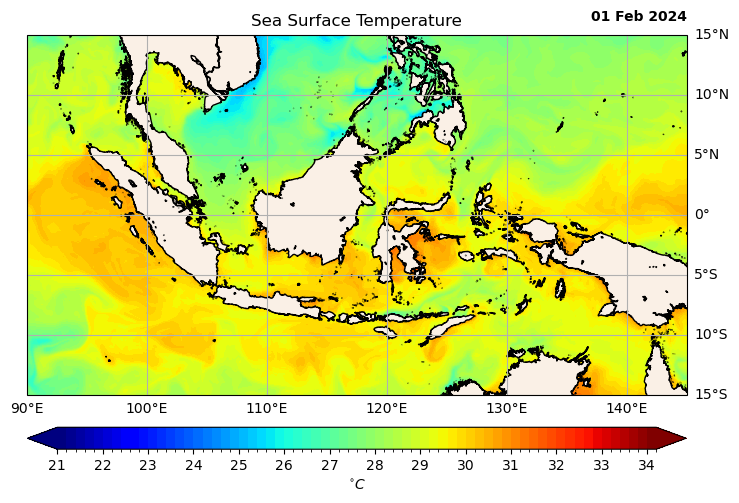

In [8]:
# Proyeksi dan fitur
proj_transf = ccrs.PlateCarree()
mfeature = cfeature.GSHHSFeature(scale='h', levels=[1,2,3,4], facecolor='linen')

# Level SST
vmin, vmax, step = 21, 34, 0.2
levels = np.arange(vmin, vmax + step, step)

# Buat colormap dan norm untuk diskritisasi warna
cmap = cm.get_cmap('jet', len(levels) - 1)  # colormap discrete
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)

# Buat figure dan axis dengan proyeksi Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj_transf})

# Plotkan DataArray ke axis yang sudah berproyeksi
map_sst = da_sst_idx.plot(
    ax=ax,
    transform=proj_transf,
    cmap=cmap,
    norm=norm,
    add_colorbar=False  # kita akan tambahkan colorbar manual
)

# Tambahkan colorbar 
cbar = plt.colorbar(
    map_sst,
    ax=ax,
    orientation='horizontal',
    pad=0.07,
    shrink=0.85,
    aspect=30,
    ticks=np.arange(vmin, vmax + 1, 1),  # major ticks tiap 1 derajat
    label=r'$^{\circ}C$',
    extend='both'
)

# Tambahkan fitur GSHHS
ax.add_feature(mfeature)

# Tambahkan gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.left_labels = False
gl.right_labels = True
gl.bottom_labels = True

ax.text(
    1.0, 1.03,                                                      # posisi (x=kanan, y=sedikit di atas)
    f"{da_sst_idx.date.dt.strftime('%d %b %Y').values}",            # teks tanggal
    transform=ax.transAxes,                                         # koordinat relatif ke axes
    ha='right',                                                     # horizontal alignment: kanan
    va='bottom',                                                    # vertical alignment: bawah
    fontsize=10,
    fontweight='bold'
)

plt.title("Sea Surface Temperature")
plt.show()

### Pengayaan 1
Membuat peta serupa dengan parameter yang berbeda atau sama namun dengan waktu yang berbeda, yang telah disesuaikan dengan wilayah bekerja

In [9]:
# Write your code here






## Data Argo float

### Load Data Argofloat

In [10]:
fl_argo_nc = '/data/local/marine-training/data/MATPEL_05/argo_data/nc_argo/GL_PR_PF_2902800.nc'
ds_argo = xr.open_dataset(fl_argo_nc)
ds_argo

<xarray.Dataset> Size: 2MB
Dimensions:                   (TIME: 220, LATITUDE: 220, LONGITUDE: 220,
                               POSITION: 220, DEPTH: 103)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2kB 2021-01-10T05:49:54 ....
  * LATITUDE                  (LATITUDE) float32 880B 4.381 4.046 ... 4.243
  * LONGITUDE                 (LONGITUDE) float32 880B 147.0 146.8 ... 130.8
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/23)
    TIME_QC                   (TIME) float32 880B ...
    POSITION_QC               (POSITION) float32 880B ...
    DC_REFERENCE              (TIME) object 2kB ...
    DIRECTION                 (TIME) object 2kB ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object 2kB ...
    PRES                      (TIME, DEPTH) float32 91kB ...
    ...                        ...
    PSAL                      (TIME, DEPTH) float64 181kB ...
    PSAL_QC                   (TIME, DEPTH) float32 91kB ...
    PSAL_ADJUSTED             (TIME, DEPTH) float64 181kB ...
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 91kB ...
    PSAL_ADJUSTED_DM          (TIME, DEPTH) object 181kB ...
    PSAL_ADJUSTED_ERROR       (TIME, DEPTH) float64 181kB ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  2902800
    institution:                    First Institute of Oceanography - Ministr...
    institution_edmo_code:          4640
    site_code:                       
    ...                             ...
    last_date_observation:          2025-04-05T01:30:25Z
    last_latitude_observation:      4.24300
    last_longitude_observation:     130.82900
    date_update:                    2025-04-15T09:50:18Z
    history:                        2025-04-15T09:50:18Z : Creation
    data_mode:                      M

### Membuat plot trajektori float

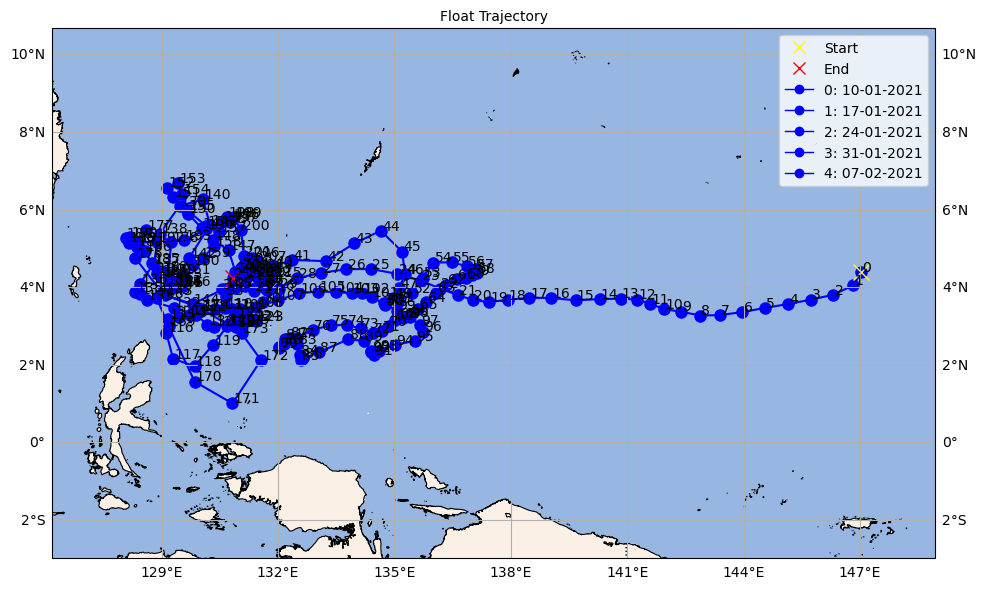

In [11]:
from matplotlib.lines import Line2D
import pandas as pd
from mods import compute_extent

lons, lats = ds_argo.LONGITUDE.values, ds_argo.LATITUDE.values
dts = pd.to_datetime(ds_argo['TIME'].values)
pts = ds_argo.POSITION.values


# Final extent
exts = compute_extent(lons, lats)

# Plotting
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=proj))
ax.set_extent(exts, crs=proj)
ax.add_feature(cfeature.GSHHSFeature(scale="high", levels=[1, 2, 3, 4], facecolor="linen"), linewidth=.8)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.OCEAN)

# Plot trajektori
ax.plot(lons, lats, color='blue', linewidth=1.5, marker='o', markersize=8, transform=proj, label='Trajectory')
ax.plot(lons[0], lats[0], marker='x', color='yellow', markersize=12, transform=proj, label='Start')
ax.plot(lons[-1], lats[-1], marker='x', color='red', markersize=12, transform=proj, label='End')

# Label waktu opsional
for i,pt in enumerate(pts):
    ax.text(lons[i]+.03, lats[i]+.03, pt, fontsize=10, transform=proj)

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.left_labels = True
gl.right_labels = True
gl.bottom_labels = True    

# Legenda dan layout
legend_elements = [
    Line2D([0], [0], lw=0, marker='x', color='yellow', label='Start', markersize=8),
    Line2D([0], [0], lw=0, marker='x', color='red', label='End', markersize=8)
]

# Menambahkan elemen legenda berdasarkan data
for i in range(min(5, len(pts))):
    legend_elements.append(
        Line2D([0], [0], lw=1, marker='o', color='blue', label=f'{pts[i]}: {dts[i].strftime("%d-%m-%Y")}')
    )

# Set legend dan title
ax.legend(handles=legend_elements, loc='upper right')
ax.set_title('Float Trajectory', fontsize=10)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [12]:
from mods import animate_argo_trajectory
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 52428800  # Naikkan limit ke 50 MB
argo_ani, argo_html = animate_argo_trajectory(lons, lats, dts, pts, exts)

# Tampilkan animasi di Jupyter
argo_html

KeyboardInterrupt: 

In [ ]:
# save the animation
# argo_ani.save('trajectory_animation.gif', writer='pillow', fps=10)

## Data Drifter

### Load Data

In [ ]:
# Load into dataframe
path_drifter_csv = '/data/local/marine-training/data/MATPEL_05/drifter_data/drifter_6hour_qc_f5dd_5de7_fd9d.csv'
raw_df = pd.read_csv(path_drifter_csv)

# Display basic info and the first few rows
raw_df.info()

In [ ]:
# Ambil baris pertama sebagai header yang benar
new_header = np.asarray(raw_df.columns)
df = raw_df[1:]
df.columns = new_header

# Drop rows dengan ID, latitude, atau longitude kosong
df = df.dropna(subset=["ID", "latitude", "longitude"])

# Konversi tipe data yang diperlukan
df["ID"] = df["ID"].astype(int)
df["latitude"] = df["latitude"].astype(float)
df["longitude"] = df["longitude"].astype(float)
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%SZ")
df["start_date"] = pd.to_datetime(df["start_date"], format="%Y-%m-%dT%H:%M:%SZ")
df["deploy_date"] = pd.to_datetime(df["deploy_date"], format="%Y-%m-%dT%H:%M:%SZ")
df["end_date"] = pd.to_datetime(df["end_date"], format="%Y-%m-%dT%H:%M:%SZ")
df["drogue_lost_date"] = pd.to_datetime(df["drogue_lost_date"], format="%Y-%m-%dT%H:%M:%SZ")


# Ambil ID unik
unique_ids = df["ID"].unique()

# Tampilkan jumlah dan sampel ID
len(unique_ids), [int(i) for i in unique_ids[:20]]


### Plot Trajectory Drifter

In [ ]:
# Menentukan extend peta
exts = [88, 147, -17, 17]

# Menentukan colors yang akan digunakan
n = len(unique_ids)  # jumlah data
cmap = plt.get_cmap('jet')  # bisa juga 'plasma', 'hsv', 'turbo', dll.

# generate list warna
colors = [cmap(i / n) for i in range(n)]

# Menentukan rasio gambar
p=10
l=6
rat = p/l
pj = 12

# Plotting
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(pj, pj/rat), subplot_kw=dict(projection=proj))
ax.set_extent(exts, crs=proj)
ax.add_feature(cfeature.GSHHSFeature(scale="high", levels=[1, 2, 3, 4], facecolor="linen"), linewidth=.8)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.OCEAN)
legend_elements = []

# Plot trajektori
for i, idd in enumerate(unique_ids):
    lons = df.loc[df["ID"]==idd]['longitude'].values
    lats = df.loc[df["ID"]==idd]['latitude'].values
    ax.plot(lons, lats, color=colors[i], linewidth=1.5, marker='.', markersize=8, transform=proj)

    # Menambahkan elemen legenda berdasarkan data
    legend_elements.append(
        Line2D([0], [0], lw=0, marker='o', color=colors[i], label=f'{idd}')
    )

ax.legend(handles=legend_elements, loc='upper left', ncol=2, fontsize=7)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.left_labels = True
gl.right_labels = True
gl.bottom_labels = True
ax.set_title('Drifter Trajectories', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Buat animasi
from mods import animate_drifter_trajectory

id_drifter = 300234060253330
argo_ani, argo_html = animate_drifter_trajectory(df, id_drifter, exts)

argo_html

